# Credit Card Farud Detection Using Logistic Regression
Aurthor :Irfan Ullah Khan

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/programmarself)
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/programmarself)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/irfan-ullah-khan-4a2871208/)  

[![YouTube](https://img.shields.io/badge/YouTube-Profile-red?style=for-the-badge&logo=youtube)](https://www.youtube.com/@irfanullahkhan7748)
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:programmarself@gmail.com)

### Importing Necessary Libraries


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [4]:
df=pd.read_csv("/content/fraudTest.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50828 entries, 0 to 50827
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             50828 non-null  int64  
 1   trans_date_trans_time  50828 non-null  float64
 2   cc_num                 50828 non-null  float64
 3   merchant               50828 non-null  object 
 4   category               50828 non-null  object 
 5   amt                    50828 non-null  float64
 6   first                  50828 non-null  object 
 7   last                   50828 non-null  object 
 8   gender                 50828 non-null  object 
 9   street                 50828 non-null  object 
 10  city                   50828 non-null  object 
 11  state                  50827 non-null  object 
 12  zip                    50827 non-null  float64
 13  lat                    50827 non-null  float64
 14  long                   50827 non-null  float64
 15  ci

In [6]:
df.describe()

,Unnamed: 0,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,50828.000000,50828.000000,5.082800e+04,50828.000000,50827.000000,50827.000000,50827.000000,5.082700e+04,5.082700e+04,50827.000000,50827.000000,50827.000000
mean,25413.500000,44011.977918,4.156839e+17,69.463839,48700.820351,38.529231,-90.129194,9.060929e+04,1.372548e+09,38.527153,-90.128117,0.003994
std,14672.924078,5.115022,1.306796e+18,151.240739,26784.263353,5.082601,13.626911,3.050685e+05,4.419302e+05,5.117862,13.639614,0.063072
min,0.000000,44003.510010,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.042320,-166.646251,0.000000
25%,12706.750000,44007.500643,1.800000e+14,9.760000,26237.000000,34.590600,-96.743000,7.430000e+02,1.372162e+09,34.716423,-96.800486,0.000000
50%,25413.500000,44011.847265,3.520000e+15,47.075000,48088.000000,39.371600,-87.456900,2.443000e+03,1.372537e+09,39.367259,-87.368183,0.000000
75%,38120.250000,44016.835023,4.630000e+15,82.680000,72011.000000,42.014400,-80.175200,2.032800e+04,1.372968e+09,41.974951,-80.249048,0.000000
max,50827.000000,44020.522400,4.990000e+18,13149.150000,99783.000000,65.689900,-67.950300,2.906700e+06,1.373287e+09,66.669356,-66.955602,1.000000


In [7]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,44003.51001,2.290000e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,19-03-68,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,44003.51010,3.570000e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",17-01-90,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,44003.51034,3.600000e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",21-10-70,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,44003.51059,3.590000e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,25-07-87,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,44003.51061,3.530000e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,06-07-55,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [8]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
50823,50823,44020.52016,5.820000e+11,fraud_Pollich LLC,home,153.71,Larry,House,M,911 Sabrina Trafficway,...,41.5205,-80.0573,5507.0,Retail merchandiser,28-07-73,c01a6ad5cbc58cd325de731ce30e3a97,1.373287e+09,41.770990,-81.048185,0.0
50824,50824,44020.52041,3.550000e+15,fraud_Jast and Sons,food_dining,99.68,Kayla,Obrien,F,7921 Robert Port Suite 343,...,31.6591,-96.8094,263.0,Barrister,30-05-56,a6ab0d912b82f5807af38c36f74cc434,1.373287e+09,31.782744,-95.930477,0.0
50825,50825,44020.52061,2.710000e+15,"fraud_Towne, Greenholt and Koepp",shopping_net,10.29,Jenna,Brooks,F,50872 Alex Plain Suite 088,...,30.4066,-91.1468,378909.0,"Designer, furniture",22-02-77,a58894a170b59c50fcf0de1de2e3515e,1.373287e+09,31.312264,-90.175437,0.0
50826,50826,44020.52139,2.250000e+15,"fraud_Berge, Kautzer and Harris",personal_care,17.76,Margaret,Gibson,F,382 Williams Stream Suite 197,...,38.0828,-76.3477,313.0,Insurance underwriter,26-03-76,d595476466e21459f35cfa0145a0cf43,1.373287e+09,38.016855,-75.800061,0.0
50827,50827,44020.52240,4.860000e+12,fraud_Pollich LLC,home,17.98,Elizabeth,Payne,F,897 Daugherty Mission,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,44003.51001,2.290000e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,19-03-68,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,44003.51010,3.570000e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",17-01-90,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,44003.51034,3.600000e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",21-10-70,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,44003.51059,3.590000e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,25-07-87,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,44003.51061,3.530000e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,06-07-55,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50823,50823,44020.52016,5.820000e+11,fraud_Pollich LLC,home,153.71,Larry,House,M,911 Sabrina Trafficway,...,41.5205,-80.0573,5507.0,Retail merchandiser,28-07-73,c01a6ad5cbc58cd325de731ce30e3a97,1.373287e+09,41.770990,-81.048185,0.0
50824,50824,44020.52041,3.550000e+15,fraud_Jast and Sons,food_dining,99.68,Kayla,Obrien,F,7921 Robert Port Suite 343,...,31.6591,-96.8094,263.0,Barrister,30-05-56,a6ab0d912b82f5807af38c36f74cc434,1.373287e+09,31.782744,-95.930477,0.0
50825,50825,44020.52061,2.710000e+15,"fraud_Towne, Greenholt and Koepp",shopping_net,10.29,Jenna,Brooks,F,50872 Alex Plain Suite 088,...,30.4066,-91.1468,378909.0,"Designer, furniture",22-02-77,a58894a170b59c50fcf0de1de2e3515e,1.373287e+09,31.312264,-90.175437,0.0
50826,50826,44020.52139,2.250000e+15,"fraud_Berge, Kautzer and Harris",personal_care,17.76,Margaret,Gibson,F,382 Williams Stream Suite 197,...,38.0828,-76.3477,313.0,Insurance underwriter,26-03-76,d595476466e21459f35cfa0145a0cf43,1.373287e+09,38.016855,-75.800061,0.0


In [10]:
df.shape

(50828, 23)

In [11]:
#Checking for null values through function and heatmap
df.isnull().any()

Unnamed: 0               False
trans_date_trans_time    False
cc_num                   False
merchant                 False
category                 False
amt                      False
first                    False
last                     False
gender                   False
street                   False
city                     False
state                     True
zip                       True
lat                       True
long                      True
city_pop                  True
job                       True
dob                       True
trans_num                 True
unix_time                 True
merch_lat                 True
merch_long                True
is_fraud                  True
dtype: bool

<Axes: >

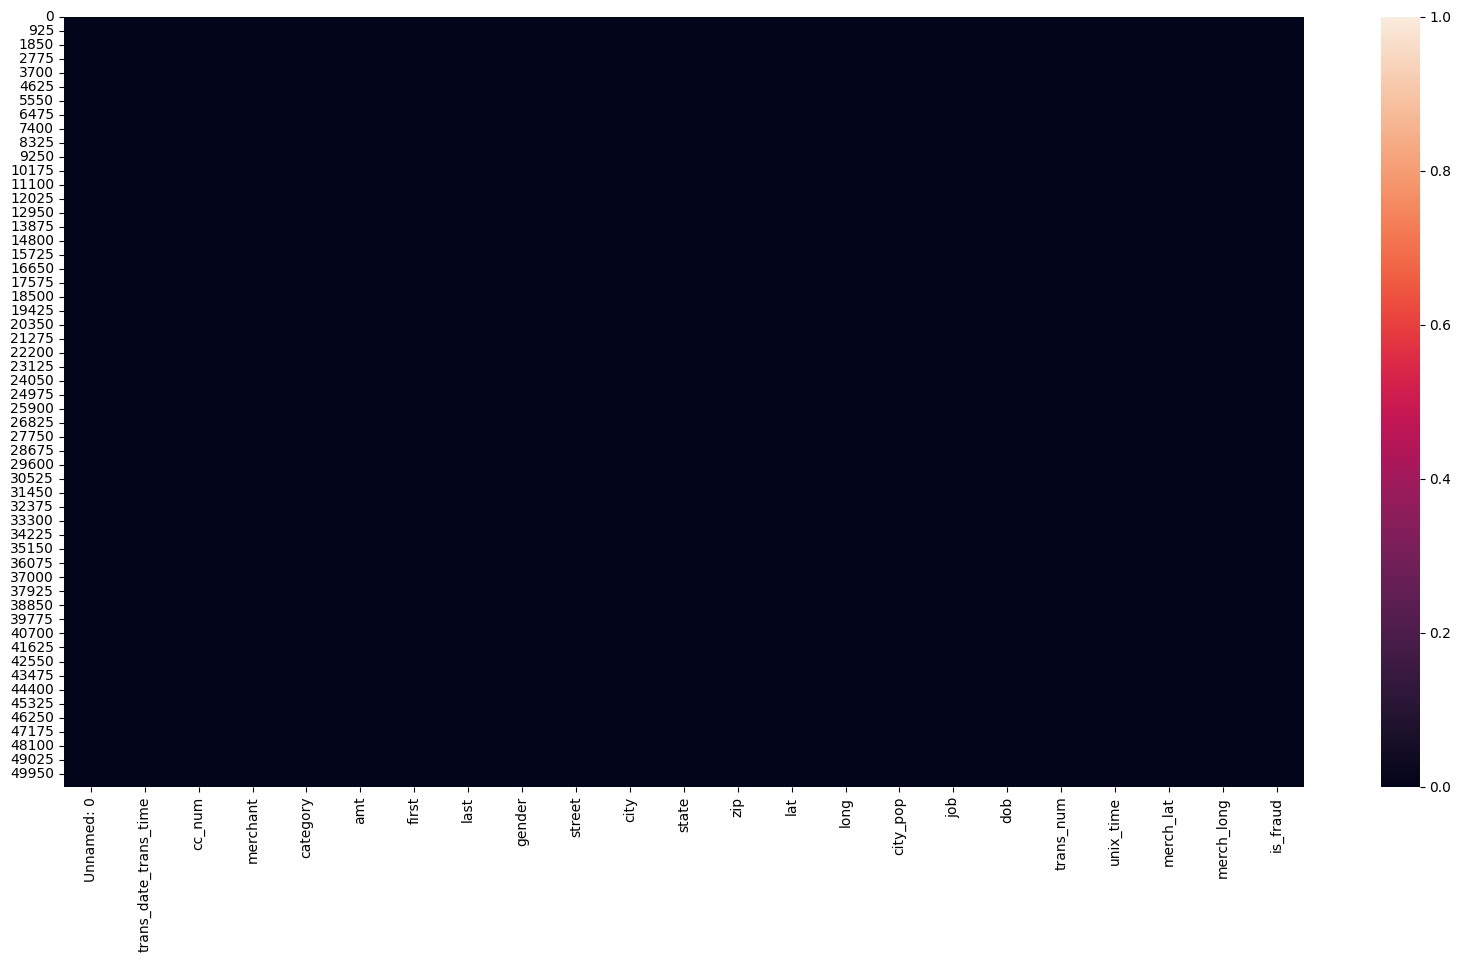

In [12]:
plt.figure(figsize = (20,10))
sns.heatmap(df.isnull())

In [13]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time    float64
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                      float64
lat                      float64
long                     float64
city_pop                 float64
job                       object
dob                       object
trans_num                 object
unix_time                float64
merch_lat                float64
merch_long               float64
is_fraud                 float64
dtype: object

In [14]:
dataset_2 = df.drop(columns = 'is_fraud')


<Axes: title={'center': ' correlation index'}>

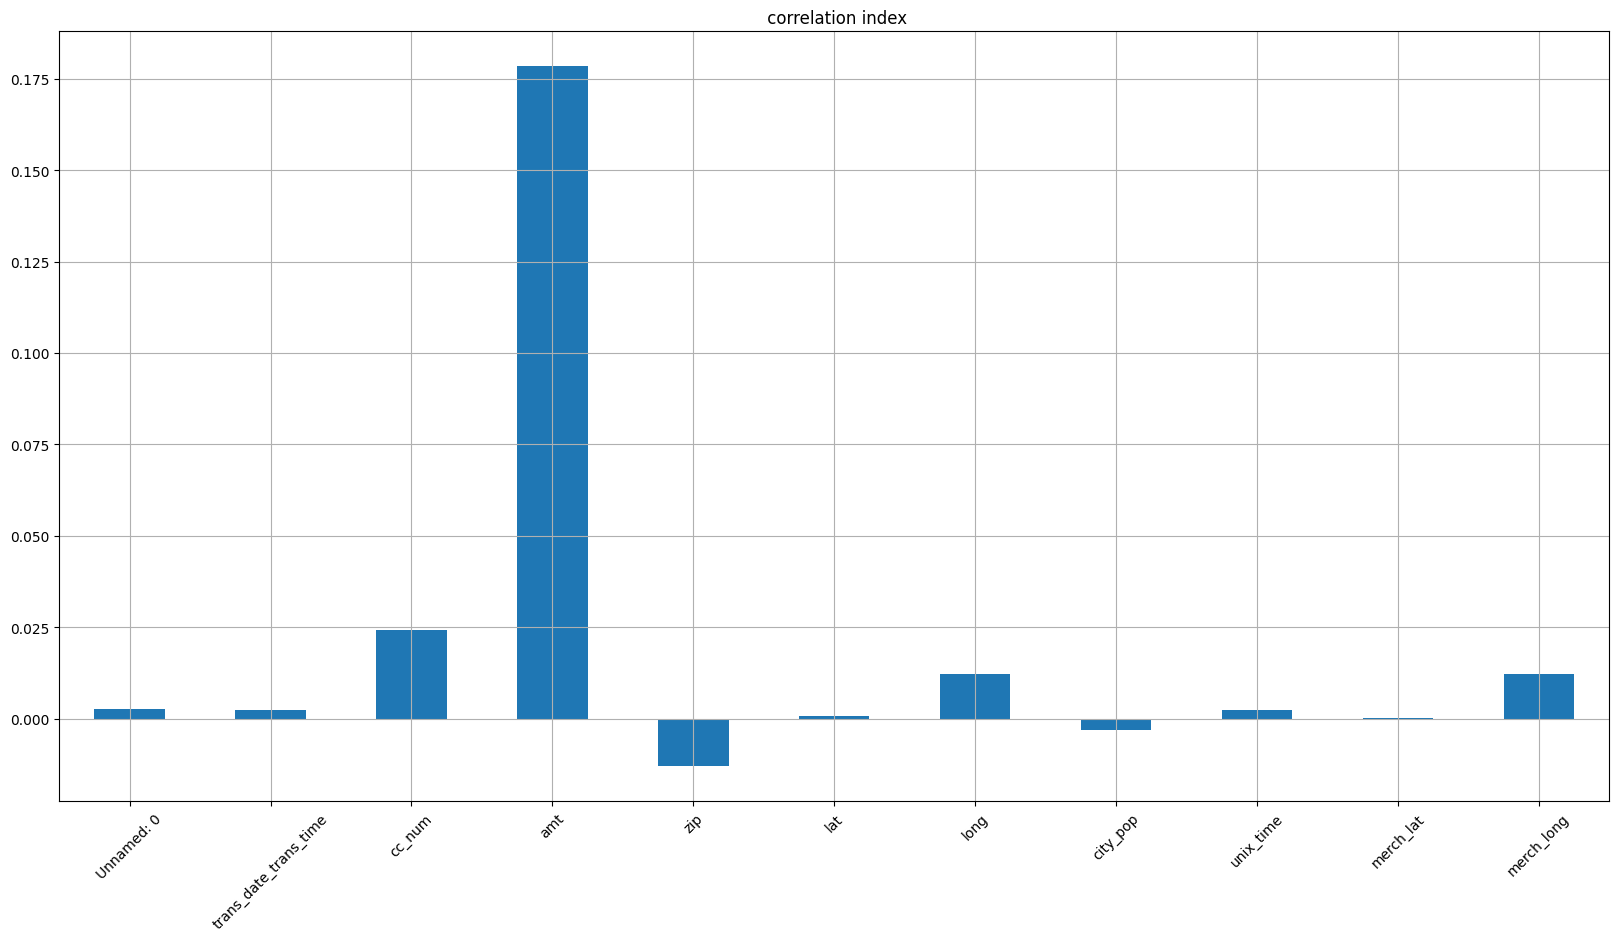

In [15]:
dataset_2.corrwith(df['is_fraud']).plot.bar(figsize = (20,10), title = ' correlation index', rot = 45, grid = True)

<Axes: >

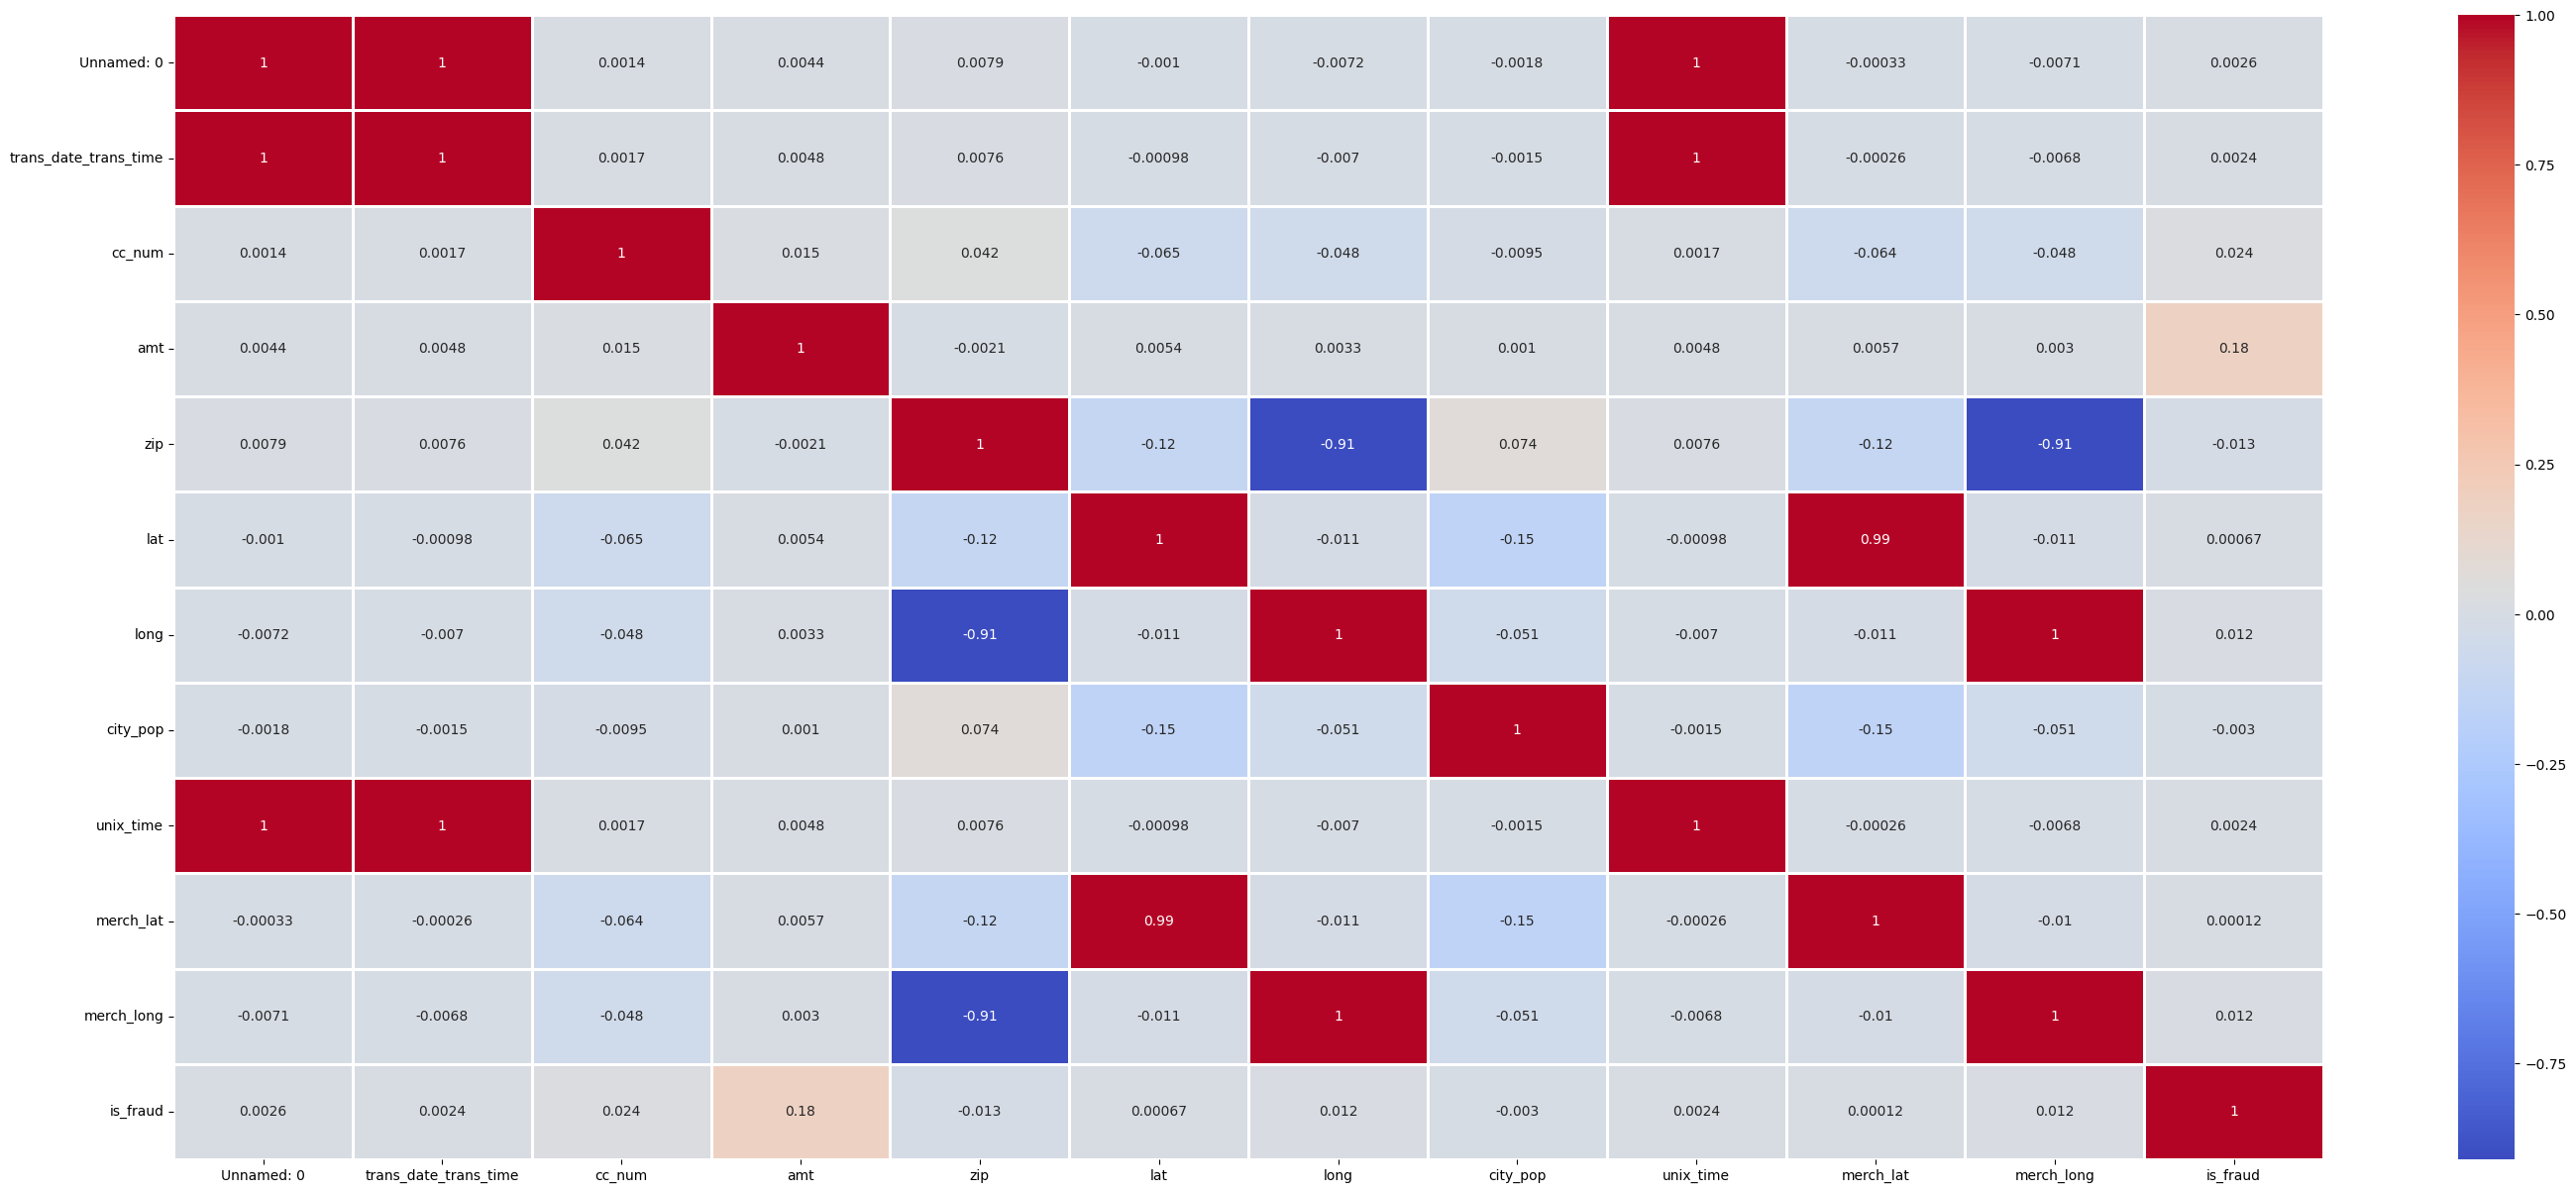

In [16]:
corr =  df.corr()
plt.figure(figsize = (35,15))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', linewidth = 2)

In [17]:
#findind the features with high correlation
high_corr = df.corr()
high_corr_features = high_corr.index[abs(high_corr['is_fraud'] > 0.5)]

In [18]:
high_corr_features

Index(['is_fraud'], dtype='object')

In [19]:
x = df.drop(columns = 'is_fraud')

In [20]:
y = df['is_fraud']

In [21]:
x

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,0,44003.51001,2.290000e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,29209.0,33.9659,-80.9355,333497.0,Mechanical engineer,19-03-68,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714
1,1,44003.51010,3.570000e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,84002.0,40.3207,-110.4360,302.0,"Sales professional, IT",17-01-90,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431
2,2,44003.51034,3.600000e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,11710.0,40.6729,-73.5365,34496.0,"Librarian, public",21-10-70,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111
3,3,44003.51059,3.590000e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,32780.0,28.5697,-80.8191,54767.0,Set designer,25-07-87,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061
4,4,44003.51061,3.530000e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,49632.0,44.2529,-85.0170,1126.0,Furniture designer,06-07-55,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50823,50823,44020.52016,5.820000e+11,fraud_Pollich LLC,home,153.71,Larry,House,M,911 Sabrina Trafficway,...,16314.0,41.5205,-80.0573,5507.0,Retail merchandiser,28-07-73,c01a6ad5cbc58cd325de731ce30e3a97,1.373287e+09,41.770990,-81.048185
50824,50824,44020.52041,3.550000e+15,fraud_Jast and Sons,food_dining,99.68,Kayla,Obrien,F,7921 Robert Port Suite 343,...,76678.0,31.6591,-96.8094,263.0,Barrister,30-05-56,a6ab0d912b82f5807af38c36f74cc434,1.373287e+09,31.782744,-95.930477
50825,50825,44020.52061,2.710000e+15,"fraud_Towne, Greenholt and Koepp",shopping_net,10.29,Jenna,Brooks,F,50872 Alex Plain Suite 088,...,70808.0,30.4066,-91.1468,378909.0,"Designer, furniture",22-02-77,a58894a170b59c50fcf0de1de2e3515e,1.373287e+09,31.312264,-90.175437
50826,50826,44020.52139,2.250000e+15,"fraud_Berge, Kautzer and Harris",personal_care,17.76,Margaret,Gibson,F,382 Williams Stream Suite 197,...,20687.0,38.0828,-76.3477,313.0,Insurance underwriter,26-03-76,d595476466e21459f35cfa0145a0cf43,1.373287e+09,38.016855,-75.800061


In [22]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
50823    0.0
50824    0.0
50825    0.0
50826    0.0
50827    NaN
Name: is_fraud, Length: 50828, dtype: float64

In [37]:
df.groupby('is_fraud').mean()


,Unnamed: 0,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
is_fraud,,,,,,,,,,,
0.0,25410.566530,44011.976974,4.136740e+17,67.756165,48722.974913,38.529015,-90.139688,90667.603014,1.372548e+09,38.527114,-90.138657
1.0,26019.857143,44012.171027,9.189346e+17,495.575911,43175.931034,38.583064,-87.512188,76067.596059,1.372565e+09,38.537012,-87.499626


In [42]:
x=df.drop('is_fraud',axis=1)

In [43]:
y=df['is_fraud']

In [44]:
y.shape

(50828,)

In [45]:
x.shape

(50828, 22)

In [47]:
missing_values = y.isnull().sum()
if missing_values.any():
    print("There are missing values in 'y'.")

There are missing values in 'y'.


In [49]:
# Option 2: Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
y = imputer.fit_transform(y.to_frame().values)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [52]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [82]:
x_train = x_train.drop('trans_date_trans_time', axis=1)

In [84]:
print(x_train.head())

       Unnamed: 0        cc_num     amt      zip      lat     long  city_pop  \
9216         9216  6.010000e+15   64.76  23937.0  36.9688 -78.5615    1970.0   
42868       42868  2.230000e+15   75.18  39769.0  33.3570 -89.0473    1923.0   
40853       40853  3.590000e+15    8.36  21750.0  39.6991 -78.1762    3766.0   
22311       22311  6.010000e+15   57.48  73754.0  36.3850 -98.0727    1078.0   
4832         4832  3.030000e+13  133.29  72165.0  35.5762 -91.4539     111.0   

            dob                         trans_num     unix_time  merch_lat  \
9216   02-09-85  205b896137189f145f86261f6b00e75d  1.372018e+09  37.300259   
42868  16-01-60  68661acb2f7b6bf0acad21f563cf4a01  1.373091e+09  33.787372   
40853  14-02-84  bd0445c0bf554893fd3ccd1adfd530dc  1.373044e+09  40.087332   
22311  06-07-52  81b20a651bb36ef406895e74245fa110  1.372471e+09  36.388727   
4832   13-06-00  2ffeb77b10ee6744f85a6602a471faaf  1.371924e+09  35.665908   

       merch_long  
9216   -78.493307  
42868  -88

In [85]:
print(x_train.dtypes)

Unnamed: 0      int64
cc_num        float64
amt           float64
zip           float64
lat           float64
long          float64
city_pop      float64
dob            object
trans_num      object
unix_time     float64
merch_lat     float64
merch_long    float64
dtype: object


In [92]:
x_train = x_train.drop('trans_num', axis=1)


In [94]:
print(x_train.columns)
print(x_test.columns)

Index(['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long'],
      dtype='object')
Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long'],
      dtype='object')


In [95]:
missing_cols = set(x_train.columns) - set(x_test.columns)
if missing_cols:
    raise ValueError(f"Missing columns in x_test: {missing_cols}")

In [97]:
x_test.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long'],
      dtype='object')

In [102]:
print("Columns in x_train:", x_train.columns)
print("Columns in x_test:", x_test.columns)


Columns in x_train: Index(['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long'],
      dtype='object')
Columns in x_test: Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long'],
      dtype='object')


In [103]:
# Check and align columns in x_train and x_test
common_columns = set(x_train.columns) & set(x_test.columns)
x_train = x_train[common_columns]
x_test = x_test[common_columns]

# Now, fit and predict
model = LogisticRegression()
model.fit(x_train, y_train)
ypred = model.predict(x_test)


In [105]:
accuracy_score(ypred,y_test)*100


99.59669486523707